In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from numpy.linalg import norm 
from scipy.integrate import simps
import scipy.constants as pcst
plt.rcParams['figure.figsize'] = (5.0, 5.0) 

In [2]:
## Quelques paramètres
nCorp = 9
Msol=1.989e30 # kg masse soleil
Mmer=3.3011e23#23
Mven=4.8675e24
Mter=5.972e24 #kg masse terre
Mmar=6.4185e23
Mjup=1.8986e27 #correction
Msat=5.6846e26
Mura=8.6810e25
Mnep=102.43e24
#Mlun=7.34767309e22 # kg masse lune
Rst= 149.6e9 # m distance soleil-terre
Rtl=384400e3 # m distance terre-lune

# quelques constantes physique
G=pcst.gravitational_constant #SI
UA = 150.0e9

#Pour systeme sol Corps

m = [Msol, Mmer, Mven, Mter, Mmar, Mjup, Msat, Mura, Mnep]

# Temps de la simulation
tSimu = 365*24*3600*100

# Condition epsilon de variation de la vitesse
eps = 0.01

# Tableaus sur les masses des n-corps
tab_M = np.outer(m,m)

M = np.zeros([nCorp,nCorp])
M[:] = m

In [3]:
#nCorp = 9
## Initialisation données de position et vitesse (x et v)
#x = np.zeros([nCorp,3])
#v = np.zeros([nCorp,3])
#
## Conditions initiales des n-Corps
##Corps,xyz,t
##Mercure
#x[1] = UA*np.array([-0.3936075875560, -0.0581672802186, 0.0097241052554])
#v[1] = np.array([-0.0023402806206 -0.0237194970911 -0.0124283517572])*UA
##Venus
#x[2] = np.array([0.3044348026187 ,-0.5956444406213 ,-0.2872765035484])*UA
#v[2] = np.array([0.0182336810360 ,0.0080756592308 ,0.0024800882857])*UA
##Terre
#x[3] = np.array([-0.7230075877916 ,-0.6449911881528 ,-0.2795973147499])*UA
#v[3] = np.array([0.0117200633339 ,-0.0113775301422 ,-0.0049326952800])*UA
##Mars
#x[4] = np.array([0.8258070867773 ,-1.0158748100965 ,-0.4882412249277])*UA
#v[4] = np.array([0.0118132421323 ,0.0087301932440 ,0.0036856169189])*UA
##Jupiter
#x[5] = np.array([4.8962875522201 ,-0.7369481629587 ,-0.4350601610616])*UA
#v[5] = np.array([0.0012014734479 ,0.0071778766718 ,0.0030473901081])*UA
##Saturn
#x[6] = np.array([7.3981121994211 ,-5.9520622196150 ,-2.7770138348888])*UA
#v[6] = np.array([0.0033945973249 ,0.0039073869830 ,0.0014678548265])*UA
##Uranus
#x[7] = np.array([14.0566856361498 ,12.7215007118186 ,5.3727882835593])*UA
#v[7] = np.array([-0.0027841842702 ,0.0023950765182 ,0.0010882160661])*UA
##Neptune
#x[8] = np.array([29.6817076443130 ,-3.1540912504566 ,-2.0299859703627])*UA
#v[8] = np.array([0.0003696297560 ,0.0029123014542 ,0.0011829391855])*UA
#
#d = func_dist(x,nCorp)
#f = func_FT(x,d,nCorp)


In [ ]:
nCorp = 9

# Initialisation données de position et vitesse (x et v)
x = np.zeros([nCorp,3])
v = np.zeros([nCorp,3])

# Conditions initiales des n-Corps
#Corps,xyz
#Mercure
x[1] = np.array([-0.3936075875560, -0.0581672802186, 0.0097241052554])*UA
v[1] = np.array([-0.0023402806206, -0.0237194970911 ,-0.0124283517572])*UA/(3600*24)
#Venus
x[2] = np.array([0.3044348026187 ,-0.5956444406213 ,-0.2872765035484])*UA
v[2] = np.array([0.0182336810360 ,0.0080756592308 ,0.0024800882857])*UA/(3600*24)
#Terre
x[3] = np.array([-0.7230075877916 ,-0.6449911881528 ,-0.2795973147499])*UA
v[3] = np.array([0.0117200633339 ,-0.0113775301422 ,-0.0049326952800])*UA/(3600*24)
#Mars
x[4] = np.array([0.8258070867773 ,-1.0158748100965 ,-0.4882412249277])*UA
v[4] = np.array([0.0118132421323 ,0.0087301932440 ,0.0036856169189])*UA/(3600*24)
#Jupiter
x[5] = np.array([4.8962875522201 ,-0.7369481629587 ,-0.4350601610616])*UA
v[5] = np.array([0.0012014734479 ,0.0071778766718 ,0.0030473901081])*UA/(3600*24)
#Saturn
x[6] = np.array([7.3981121994211 ,-5.9520622196150 ,-2.7770138348888])*UA
v[6] = np.array([0.0033945973249 ,0.0039073869830 ,0.0014678548265])*UA/(3600*24)
#Uranus
x[7] = np.array([14.0566856361498 ,12.7215007118186 ,5.3727882835593])*UA
v[7] = np.array([-0.0027841842702 ,0.0023950765182 ,0.0010882160661])*UA/(3600*24)
#Neptune
x[8] = np.array([29.6817076443130 ,-3.1540912504566 ,-2.0299859703627])*UA
v[8] = np.array([0.0003696297560 ,0.0029123014542 ,0.0011829391855])*UA/(3600*24)

# Modification des vitesses pour avoir un CDM immobile
v_CDM = np.zeros([3])
for i in range(3): #xyz
    for j in range(nCorp):
        v_CDM[i] += m[j]*v[j,i]
v_CDM = v_CDM/sum(m)

for i in range(3): #xyz
    for j in range(nCorp):
        v[j,i] -= v_CDM[i] 
        
# Liste des valeurs de pas de temps
tab_t = [0]
Ldt = [0]     

# Energie potentiel, cinetique et totale du système
Ep = [0]
Ec = [0]
Etot = [0]

# Valeurs initial des énergies (p=0)
Ep[0] = E_pot(x,m)
Ec[0] = E_cin(v,m)
Etot[0] = Ep[0] + Ec[0]

FT = np.zeros([3,nCorp,nCorp])

# Integration temporelle
p = 0
datax = np.zeros([nCorp,1]).tolist()
datay = np.zeros([nCorp,1]).tolist()
dataz = np.zeros([nCorp,1]).tolist()
#print(datax)

while (tab_t[-1]<tSimu):
    
    if (p%500 == 0):
        print("p: ",p,"  Time(%): ", tab_t[-1]/tSimu*100)
        
    Dist = func_dist(x,nCorp)
    
    FT = func_FT(x,Dist,nCorp)
    
    dt = min_dt(m,v,FT,eps,nCorp)

    tab_t.append(tab_t[-1] + dt)
    
    Ldt.append(dt)
    
    for i in range(3): #xyz
        # maj vitesses
        v[:,i]=v[:,i]+dt*sum(FT[i,:]*np.divide(1,M[:]))
        
        # maj positions
        x[:,i]=x[:,i]+v[:,i]*dt
    
    if (p%10 == 0):
        for i in range(nCorp):
        #datax = np.zeros([nCorp,len(tab_t)])
        #datay = np.zeros([nCorp,len(tab_t)])
        #dataz = np.zeros([nCorp,len(tab_t)])
            datax[i].append(x[i,0])
            datay[i].append(x[i,1])
            dataz[i].append(x[i,2])
            
            
        Ep = np.append(Ep,E_pot(x,m))
        Ec = np.append(Ec,E_cin(v,m))
        Etot = np.append(Etot,Ec[-1]+Ep[-1])
    
    p += 1
print('Done')
#print(datax[0])

p:  0   Time(%):  0.0


C:\Users\PC-PierreCalvet\AppData\Local\Temp/ipykernel_2172/2062220584.py:24: RuntimeWarning: divide by zero encountered in true_divide
  FT[i] = G*tab_M*Dist[i]*np.divide(1,Norm_c)
C:\Users\PC-PierreCalvet\AppData\Local\Temp/ipykernel_2172/2062220584.py:24: RuntimeWarning: invalid value encountered in multiply
  FT[i] = G*tab_M*Dist[i]*np.divide(1,Norm_c)
C:\Users\PC-PierreCalvet\AppData\Local\Temp/ipykernel_2172/2062220584.py:57: RuntimeWarning: divide by zero encountered in true_divide
  res[:] = np.divide(1,res[:])*temp


p:  500   Time(%):  0.19704994713419932
p:  1000   Time(%):  0.39802707269088616
p:  1500   Time(%):  0.5884105127433209
p:  2000   Time(%):  0.7710863732783995
p:  2500   Time(%):  0.9584700790408083
p:  3000   Time(%):  1.156576634630518
p:  3500   Time(%):  1.3540356518322874
p:  4000   Time(%):  1.5405575918882803
p:  4500   Time(%):  1.722791088477389
p:  5000   Time(%):  1.912130447645128
p:  5500   Time(%):  2.1100741837926518
p:  6000   Time(%):  2.3038379255662553
p:  6500   Time(%):  2.487691563386871
p:  7000   Time(%):  2.6702887250380507
p:  7500   Time(%):  2.861286227027184
p:  8000   Time(%):  3.0581264528794576
p:  8500   Time(%):  3.2484687747985124
p:  9000   Time(%):  3.4306536601893534
p:  9500   Time(%):  3.614108658181773
p:  10000   Time(%):  3.8062417261954056
p:  10500   Time(%):  4.0013698282422325
p:  11000   Time(%):  4.18880050504914
p:  11500   Time(%):  4.370091050087295
p:  12000   Time(%):  4.554637875453145
p:  12500   Time(%):  4.747328970630093
p:  

<IPython.core.display.Javascript object>


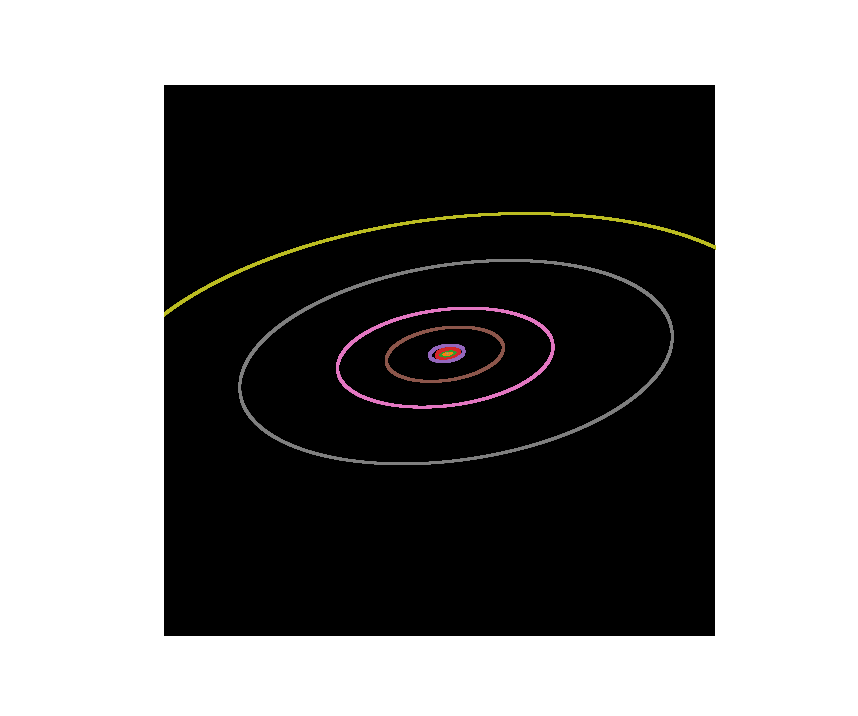

In [25]:
from mpl_toolkits.mplot3d import Axes3D

BigData =np.zeros([3,nCorp,len(datax[0])],dtype=object)
BigData[0,:] = datax[:]
BigData[1,:] = datay[:]
BigData[2,:] = dataz[:]
BigData[:,:,:] = BigData[:,:,:]/UA
BigData = np.array(BigData)

fig = plt.figure(frameon=False)
ax = fig.add_subplot(projection='3d')
ax.set_facecolor("black")

for i in range(nCorp):
    ax.plot(np.array(datax[i])/UA,np.array(datay[i])/UA,np.array(dataz[i])/UA,'o',markersize=1)

ax.grid(False)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

ax.set_xlim([-15,15])
ax.set_ylim([-15,15])
ax.set_zlim([-15,15])

ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

ax.set_xticks([]) 
ax.set_yticks([]) 
ax.set_zticks([])

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
plt.axis('off')

plt.show()


In [5]:
def E_pot(x,m):
    n = len(x)
    Ep = 0
    for i in range (n):
        for j in range(i+1,n):
            Ep += -G*m[i]*m[j]/norm(x[i,:]-x[j,:])
    return Ep

def E_cin(v,m):
    Ec = 0
    n = len(v)
    for i in range (n):
        Ec += 1/2*m[i]*norm(v[i,:])**2
    return Ec

def func_FT(x,Dist,nCorp):
    
    FT = np.zeros([3,nCorp,nCorp])
    
    Norm = np.sqrt(np.square(Dist[0])+np.square(Dist[1])+np.square(Dist[2]))
    Norm_c = np.power(Norm, 3)
    
    for i in range(3):
        FT[i] = G*tab_M*Dist[i]*np.divide(1,Norm_c)
    FT = np.nan_to_num(FT, nan=0.0)
    return FT

def func_dist(x,nCorp):
    temp_x = np.zeros([nCorp,nCorp])
    temp_y = np.zeros([nCorp,nCorp])
    temp_z = np.zeros([nCorp,nCorp])
    
    temp_x[:] = x[:,0]
    temp_y[:] = x[:,1]
    temp_z[:] = x[:,2]
    
    temp_xT = temp_x.T
    temp_yT = temp_y.T
    temp_zT = temp_z.T
    
    Dist_x = temp_xT - temp_x
    Dist_y = temp_yT - temp_y
    Dist_z = temp_zT - temp_z
    # calcule des dist à mettre dehors. func avec nvx parameter dc
    Dist = [Dist_x, Dist_y, Dist_z]
    return Dist

def min_dt(m,v,FT,eps,nCorp):
    temp = np.zeros(nCorp)
    res = np.zeros([nCorp,nCorp])
    for i in range(nCorp):
        temp[i] = eps*norm(v[i])*m[i]
        
    for i in range(nCorp):
        for j in range(nCorp):
            res[i,j] = norm(FT[:,i,j])
    res[:] = np.divide(1,res[:])*temp
    # dt = min(eps*Msol*norm(vs[:,p])/norm(FT),eps*Mter*norm(vt[:,p])/norm(FT))
    return np.min(res)

#print("dtmin:", min_dt(m,v,FT,eps,9))
#disttemp = func_dist(x,3)
#func_FT(x,func_dist(x,9),9)

<IPython.core.display.Javascript object>


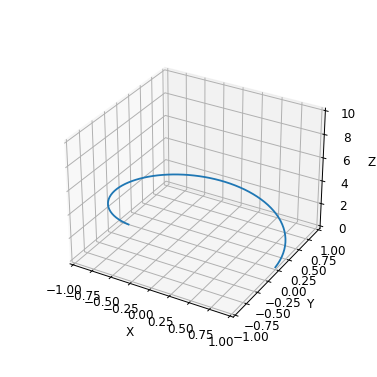

In [144]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

def gen(n):
    phi = 0
    while phi < 2*np.pi:
        yield np.array([np.cos(phi), np.sin(phi), phi])
        phi += 2*np.pi/n

def update(num, data, line):
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])

N = 100
data = np.array(list(gen(N))).T
line, = ax.plot(data[0, 0:1], data[1, 0:1], data[2, 0:1])

# Setting the axes properties
ax.set_xlim3d([-1.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([-1.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 10.0])
ax.set_zlabel('Z')

ani = animation.FuncAnimation(fig, update, N, fargs=(data, line), interval=10000/N, blit=False)
#ani.save('matplot003.gif', writer='imagemagick')
plt.show()

In [173]:
for i in range(5,1,-1):
    print(i)

5
4
3
2


In [183]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = np.linspace(0, 2 * np.pi, 100)

# generate 10 curves
y = np.sin(x.reshape(-1, 1) + np.random.uniform(0, 2 * np.pi, (1, 10)))

z = np.sin(x.reshape(-1, 1) + np.random.uniform(0, 2 * np.pi, (1, 10)))

fig, ax = plt.add_subplots(projection='3d')
ax.set(xlim=(0, 2 * np.pi), ylim=(-1.5, 1.5),zlim=(-1.5, 1.5))
# lines = [ax.plot([], [], lw=2)[0] for _ in range(y.shape[1])]
lines = ax.plot(np.empty((0, y.shape[1])), np.empty((0, y.shape[1])),np.empty((0, z.shape[1])), lw=2)

def animate(i):
    for line_k, y_k in zip(lines, y.T):
        z_k[:i]=y_k[:i]
        line_k.set_data(x[:i], y_k[:i], z_k[:i])
        line.set_3d_properties(z_k[:i])
    return lines

anim = FuncAnimation(fig, animate, frames=x.size, interval=200, repeat=False)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'add_subplots'

In [192]:
print(0:2)

SyntaxError: invalid syntax (Temp/ipykernel_9396/3694954966.py, line 1)

In [193]:
a = [1,2,3,4]
print(a[0:2])

[1, 2]
